⚠️  skipping short or malformed line 2052: '599.92+56962104'


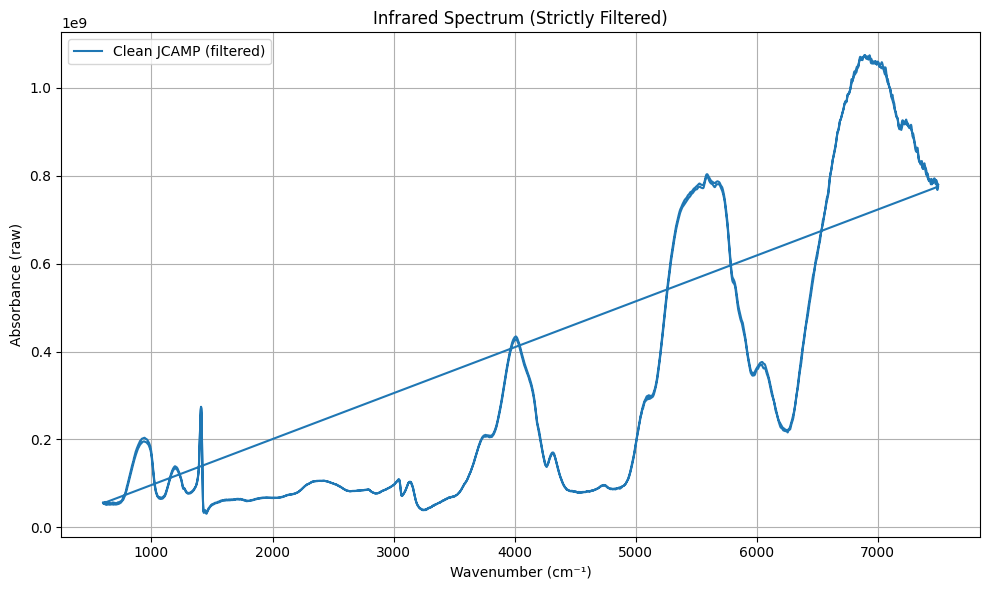

In [1]:
import re
import matplotlib.pyplot as plt

x_vals = []
y_vals = []

with open("12125-02-9-IR.jdx", "r", encoding="latin-1") as f:
    lines = f.readlines()

for line_num, line in enumerate(lines, start=1):
    line = line.strip()
    if line.startswith("##") or not line:
        continue

    match = re.match(r"([-+]?[0-9]*\.?[0-9]+)(.+)", line)
    if match:
        start_x = float(match.group(1))
        y_blob = match.group(2)
        y_matches = re.findall(r"\+[-+]?[0-9]+", y_blob)

        if len(y_matches) < 3:
            print(f"⚠️  skipping short or malformed line {line_num}: {repr(line)}")
            continue  # too short to be valid

        y_row = [int(y.replace("+", "")) for y in y_matches]
        deltax = -0.96450084
        row_x = [start_x + i * deltax for i in range(len(y_row))]

        x_vals.extend(row_x)
        y_vals.extend(y_row)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Clean JCAMP (filtered)")
plt.title("Infrared Spectrum (Strictly Filtered)")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Absorbance (raw)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



